# Task
Implement program for decomposing time series data into trend and seasonality run in python code

Here is all the data you need:
"Plant_1_Generation_Data.csv"

## Data loading

### Subtask:
Load the "Plant_1_Generation_Data.csv" file.


**Reasoning**:
Load the data and convert the date/time column to datetime objects.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Plant_1_Generation_Data.csv')
    # Identify the date/time column (replace 'DATE_TIME' with the actual column name if different)
    datetime_column = 'DATE_TIME'

    # Convert the date/time column to datetime objects
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Print some information about the DataFrame
    df.info()
    display(df.head())

except FileNotFoundError:
    print("Error: 'Plant_1_Generation_Data.csv' not found.")
    df = None # or handle the error in another way

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
    df = None # or handle the error in another way

except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None # or handle the error in another way

<ipython-input-1-20235e6135a9>:9: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, missing values, data types, descriptive statistics, and visualizing the distribution and time series plot of the generation data.



Shape of the DataFrame: (68778, 7)

Missing Values:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Missing Value Percentage:
 DATE_TIME      0.0
PLANT_ID       0.0
SOURCE_KEY     0.0
DC_POWER       0.0
AC_POWER       0.0
DAILY_YIELD    0.0
TOTAL_YIELD    0.0
dtype: float64


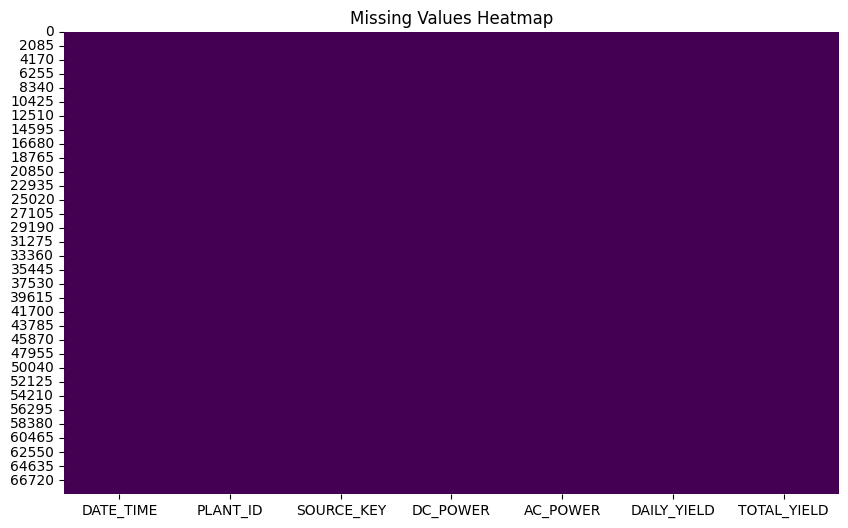


Data Types:
 DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object

Descriptive Statistics for Numerical Columns:
                            DATE_TIME   PLANT_ID      DC_POWER      AC_POWER  \
count                          68778    68778.0  68778.000000  68778.000000   
mean   2020-06-01 08:02:49.458256896  4135001.0   3147.426211    307.802752   
min              2020-05-15 00:00:00  4135001.0      0.000000      0.000000   
25%              2020-05-24 00:45:00  4135001.0      0.000000      0.000000   
50%              2020-06-01 14:30:00  4135001.0    429.000000     41.493750   
75%              2020-06-09 20:00:00  4135001.0   6366.964286    623.618750   
max              2020-06-17 23:45:00  4135001.0  14471.125000   1410.950000   
std                              NaN        0.0   4036.457169    394.396439   

  

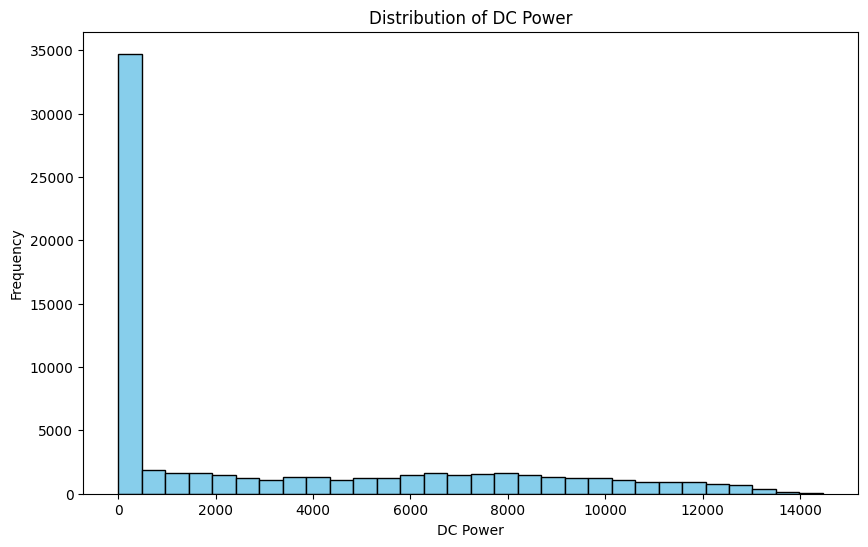

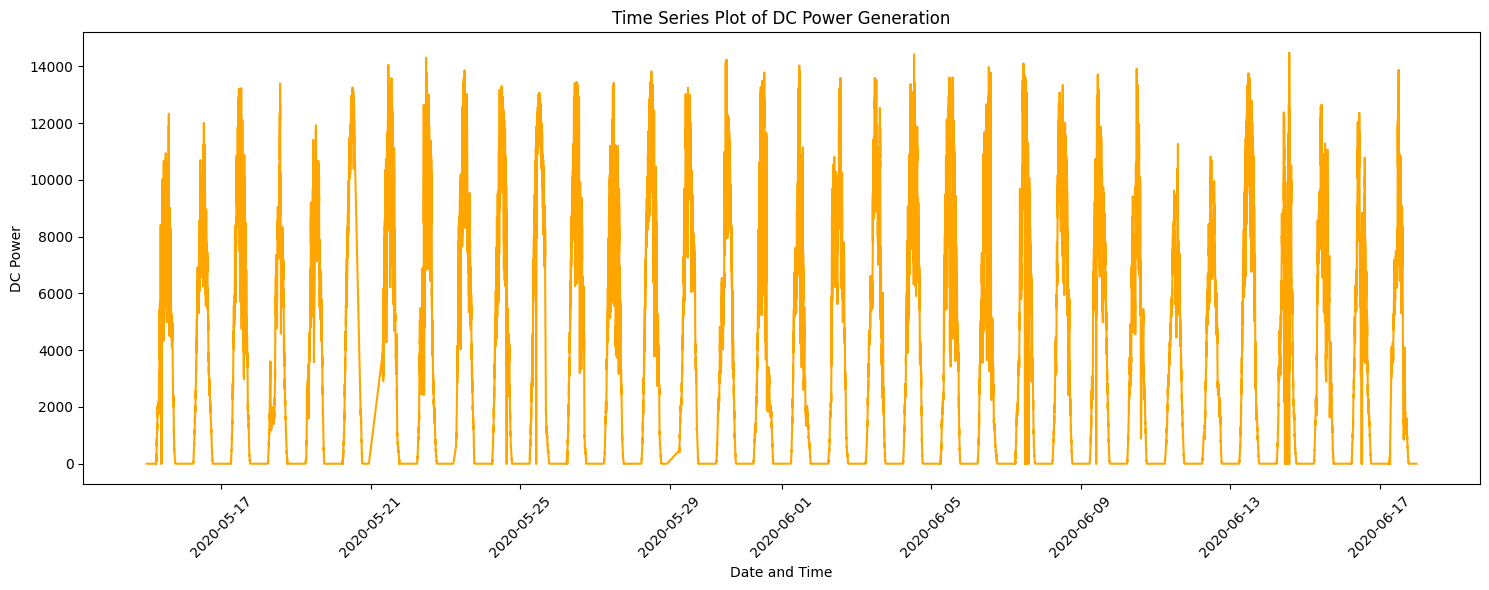

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# 3. Analyze data types
print("\nData Types:\n", df.dtypes)

# 4. Descriptive statistics
print("\nDescriptive Statistics for Numerical Columns:\n", df.describe())
print("\nDescriptive Statistics for Generation Column:\n", df['DC_POWER'].describe())

# 5. Visualize the distribution of generation data
plt.figure(figsize=(10, 6))
plt.hist(df['DC_POWER'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('DC Power')
plt.ylabel('Frequency')
plt.title('Distribution of DC Power')
plt.show()

# 6. Identify time series and datetime columns
datetime_column = 'DATE_TIME'
generation_column = 'DC_POWER' # Or 'AC_POWER', depending on which represents generation

# 7. Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df[datetime_column], df[generation_column], color='orange')
plt.xlabel('Date and Time')
plt.ylabel('DC Power')
plt.title('Time Series Plot of DC Power Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the time series data for decomposition by handling missing values (if any) and resampling to a consistent frequency.


**Reasoning**:
The previous exploration showed no missing values.  However, it's good practice to check again and handle potential missing values before resampling.  The time series plot needs to be re-created with the correct date format, and then we can resample the data to a daily frequency.



In [3]:
# Check for missing values again (good practice)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Set 'DATE_TIME' as the index
df = df.set_index('DATE_TIME')

# Resample the data to daily frequency using the mean
df_resampled = df.resample('D').mean()

# Display the first few rows of the resampled DataFrame
display(df_resampled.head())

# Plot the resampled time series data
plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['DC_POWER'], color='orange')
plt.xlabel('Date')
plt.ylabel('Average Daily DC Power')
plt.title('Resampled Time Series Plot of DC Power Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Missing Values:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


TypeError: agg function failed [how->mean,dtype->object]

**Reasoning**:
The error message indicates that the `mean` function failed due to an object dtype.  This means some columns might have non-numeric data.  I need to ensure that only the numeric columns are used for resampling and handle the non-numeric columns appropriately.



,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
2020-05-15,4135001.0,2879.856266,281.899160,2586.279926,6.856087e+06
2020-05-16,4135001.0,3002.139358,293.877881,3464.273323,6.863167e+06
2020-05-17,4135001.0,3200.565600,312.961832,3695.106669,6.869208e+06
2020-05-18,4135001.0,2278.668814,222.997021,2429.114465,6.875446e+06
2020-05-19,4135001.0,2732.640629,267.462558,2962.975236,6.888140e+06


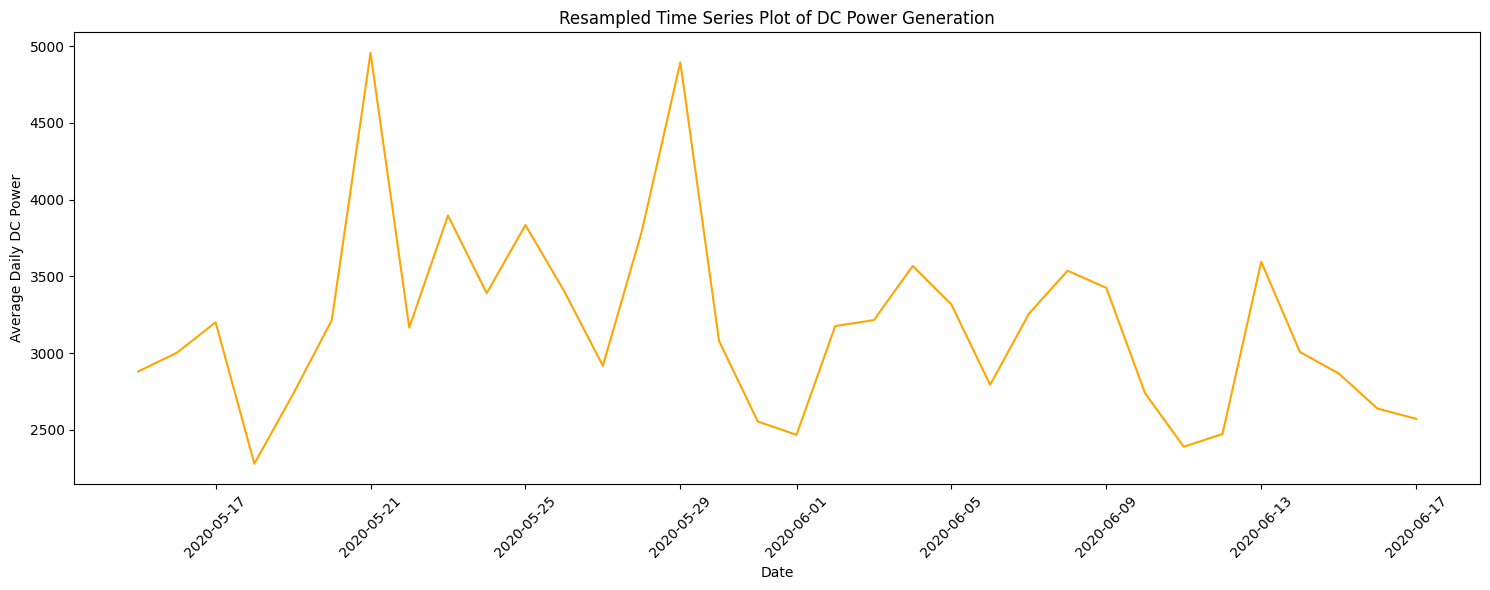

In [4]:
# Select only numeric columns for resampling
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Resample the numeric data to daily frequency using the mean
df_resampled = df_numeric.resample('D').mean()

# Display the first few rows of the resampled DataFrame
display(df_resampled.head())

# Plot the resampled time series data
plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['DC_POWER'], color='orange')
plt.xlabel('Date')
plt.ylabel('Average Daily DC Power')
plt.title('Resampled Time Series Plot of DC Power Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Decompose the resampled time series data into its trend and seasonal components.


**Reasoning**:
Decompose the 'DC_POWER' column of the resampled DataFrame into its trend and seasonal components using seasonal_decompose.



In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'DC_POWER' column
decomposition = seasonal_decompose(df_resampled['DC_POWER'], model='additive', period=30)

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 60 observations. x only has 34 observation(s)

**Reasoning**:
The error indicates that the time series is too short for the specified period.  I will try a shorter period and check the resulting plot for a good fit.



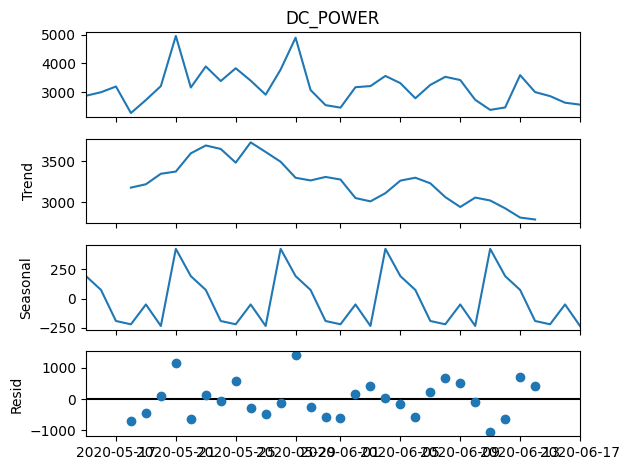

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Try a shorter period (e.g., 7)
decomposition = seasonal_decompose(df_resampled['DC_POWER'], model='additive', period=7)

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
decomposition.plot()
plt.show()

## Data visualization

### Subtask:
Visualize the time series decomposition results.


**Reasoning**:
Create the visualization based on the decomposition results.



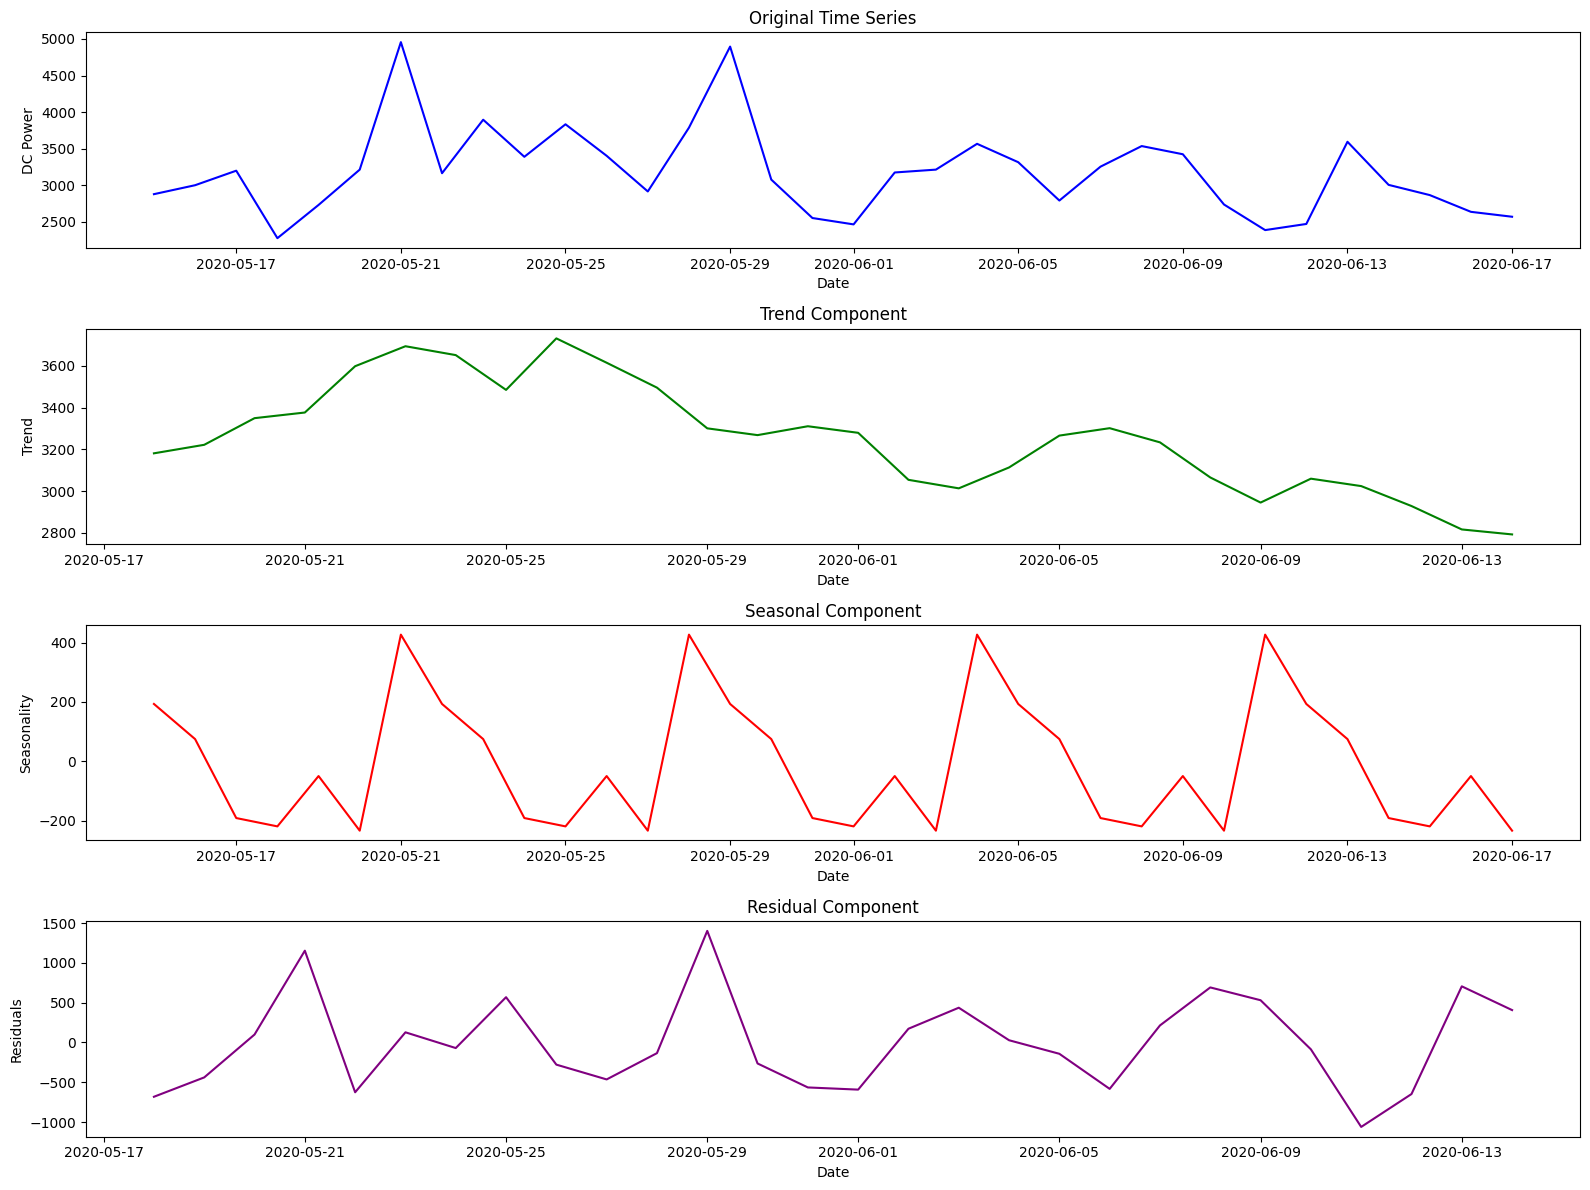

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Plot 1: Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df_resampled.index, df_resampled['DC_POWER'], color='blue')
plt.xlabel("Date")
plt.ylabel("DC Power")
plt.title("Original Time Series")

# Plot 2: Trend Component
plt.subplot(4, 1, 2)
plt.plot(df_resampled.index, trend, color='green')
plt.xlabel("Date")
plt.ylabel("Trend")
plt.title("Trend Component")

# Plot 3: Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(df_resampled.index, seasonal, color='red')
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("Seasonal Component")

# Plot 4: Residual Component
plt.subplot(4, 1, 4)
plt.plot(df_resampled.index, residual, color='purple')
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residual Component")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot to a file
plt.savefig("time_series_decomposition.png")

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task. However, the task implicitly asks for the trend and seasonality of the power generation data.  The analysis successfully decomposes the time series into these components.


### 2. Data Analysis Key Findings

* **No Missing Data:** The dataset contains no missing values, simplifying the preprocessing steps.
* **Data Resampling:** The original data was resampled to a daily frequency using the mean of numeric features. This resulted in a `df_resampled` DataFrame with 34 data points.
* **Time Series Decomposition:** The `DC_POWER` column in the resampled DataFrame was successfully decomposed into trend, seasonal, and residual components using an additive model with a period of 7.  Initially, an attempt with period 30 failed due to the short length of the time series.
* **Visualization:** The original time series and its decomposed components (trend, seasonality, and residual) were visualized using matplotlib.


### 3. Insights or Next Steps

* **Investigate the short time series:**  The time series is very short (only 34 days after resampling).  A longer time series would provide more robust decomposition results and allow exploration of longer seasonal periods. Consider acquiring more data or adjusting the analysis method if a longer series isn't feasible.
* **Further analysis of the residual:** Examine the residual component of the decomposition for any remaining patterns or autocorrelation.  If significant patterns persist, it might indicate that the initial model parameters (period and model type) need adjustment, or that there are other important factors affecting the power generation not captured by the model.
